In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('clean_raw_data.csv')


In [3]:
data.drop("Unnamed: 0", axis=1, inplace=True)


In [4]:
data.to_csv('clustering_raw_data.csv',index=False)


In [5]:
data.head()

,paperId,externalIds,publicationVenue,title,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,s2FieldsOfStudy,publicationTypes,publicationDate,title_abstract,title_word_count,title_length,abstract_word_count,abstract_length
0,a1d703d8f9aeab0f3082447ac9ac0aa723259c75,"{'MAG': '2095039986', 'DOI': '10.1021/ja909108...","{'id': '4193a393-c091-455e-858d-3d2c151b52b8',...",Fabrication of Ag@SiO(2)@Y(2)O(3):Er nanostruc...,We demonstrated that the nanostructures compri...,2010,13,460,4,"['Chemistry', 'Medicine']","[{'category': 'Chemistry', 'source': 'external...",['JournalArticle'],2010-02-16,Fabrication Ag@SiO(2)@Y(2)O(3):Er nanostructur...,32,134,108,611
1,5ee29a0137bd4aeab8c7b7fdb13f3feb36a74db1,"{'MAG': '2052825417', 'DOI': '10.2337/diacare....","{'id': '9bfe7b94-0bb4-4247-b40b-4490cabf6d8a',...",Meal-Generated Oxidative Stress in Type 2 Diab...,OBJECTIVE Free radical production has been rep...,1998,26,218,7,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],1998-09-01,Meal-Generated Oxidative Stress Type 2 Diabeti...,8,59,214,1269
2,bd21ceddfb38d7fe3658618c448f260230d264d0,"{'MAG': '1993433202', 'DOI': '10.1001/ARCHOPHT...","{'id': '5e31c5d5-eaf7-4832-aa9a-4565203cb02c',...",Sustained-release ganciclovir therapy for trea...,A surgically implantable device for sustained ...,1992,28,236,2,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...","['JournalArticle', 'ClinicalTrial', 'CaseReport']",1992-02-01,Sustained-release ganciclovir therapy treatmen...,15,112,154,994
3,3421beb461a9e3e12e970ccbac7a0cfc2e738da8,"{'PubMedCentral': '7449230', 'MAG': '304606162...","{'id': 'dc31f077-7737-4e33-baa3-bceeff44ec27',...",Evaluation of the mRNA-1273 Vaccine against SA...,Abstract Background Vaccines to prevent corona...,2020,57,848,22,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],2020-07-28,Evaluation mRNA-1273 Vaccine SARS-CoV-2 Nonhum...,10,75,295,1796
4,c1e3ed07b3ff01ce389c08f2d7884b5e8dae733f,"{'MAG': '2066485538', 'DOI': '10.1073/PNAS.060...","{'id': 'bb95bf2e-8383-4748-bf9d-d6906d091085',...",Despite slow catalysis and confused substrate ...,"The cornerstone of autotrophy, the CO(2)-fixin...",2006,55,649,62,"['Chemistry', 'Medicine']","[{'category': 'Chemistry', 'source': 'external...",['JournalArticle'],2006-05-09,Despite slow catalysis confused substrate spec...,18,132,344,1911


cluster the data per topic

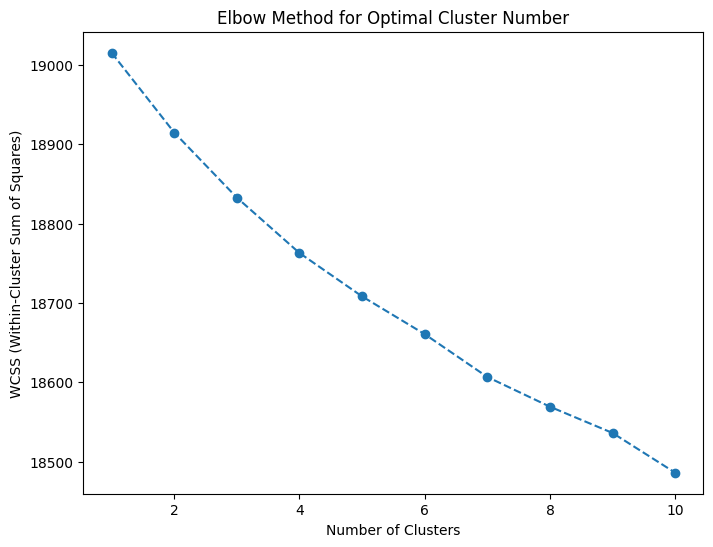

Cluster 0 (Size: 2473):
- Evaluation of the mRNA-1273 Vaccine against SARS-CoV-2 in Nonhuman Primates
- Human corneal endothelial layer repair during organ culture.
- Expression of specific cytolytic activity by H-2I region-restricted, influenza virus-specific T lymphocyte clones
- Overlapping patterns of activation of human endothelial cells by interleukin 1, tumor necrosis factor, and immune interferon.
- Spatial and temporal dissection of immediate and early events following cadherin-mediated epithelial cell adhesion
- Characteristics of established myeloma and lymphoblastoid cell lines derived from an e myeloma patient: A comparative study
- Population Biology of Antigen Presentation by MHC Class I Molecules
- The O-GlcNAc transferase gene resides on the X chromosome and is essential for embryonic stem cell viability and mouse ontogeny.
- Chondrogenic differentiation of human mesenchymal stem cells on oriented nanofibrous scaffolds: engineering the superficial zone of articular car

In [6]:

# Combine title and abstract into a single text column if not already done
data['text'] = data['title'] + ' ' + data['abstract']

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

# Based on the elbow method, choose an optimal number of clusters (e.g., k=5)
k = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Display the clusters and their corresponding documents
for cluster_id in range(k):
    cluster_data = data[data['cluster'] == cluster_id]
    print(f"Cluster {cluster_id} (Size: {len(cluster_data)}):")
    for _, row in cluster_data.iterrows():
        print(f"- {row['title']}")

# Visualize the clusters ( dimensionality reduction techniques like PCA or t-SNE for visualization)
# ...

# Further analysis, e.g., topic modeling using LDA:
# lda = LatentDirichletAllocation(n_components=k, random_state=0)
# lda.fit(tfidf_matrix)
# ...

# Visualization of topics and words within each topic:
# ...

# Additional analysis and visualization can be performed based on the specific needs of the project.


visualize the clusters after performing K-Means clustering,

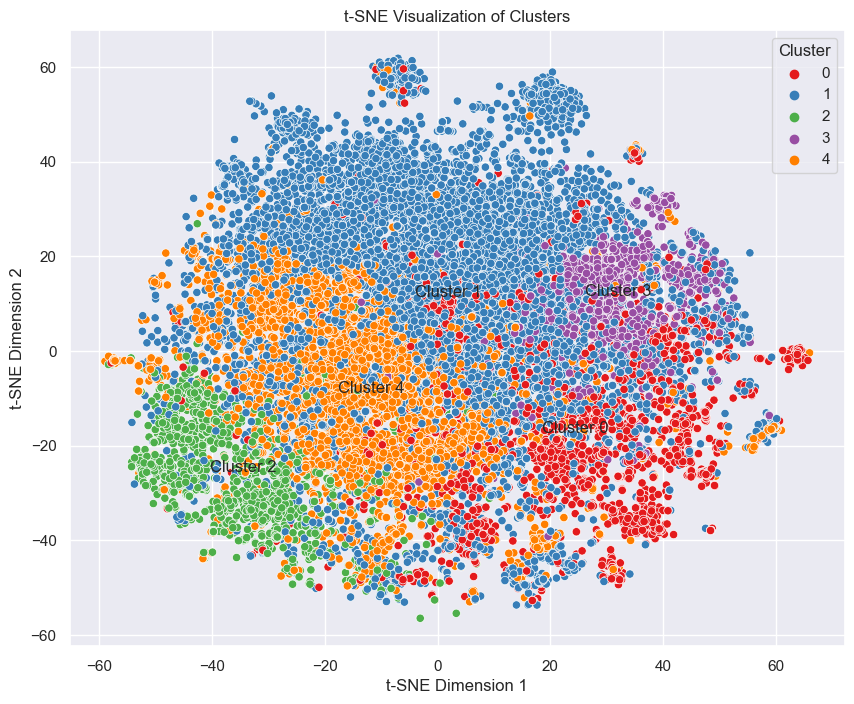

In [26]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Perform t-SNE for dimensionality reduction (2D visualization)
tsne = TSNE(n_components=2, random_state=0, init="random", perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(tfidf_matrix)

# Add t-SNE results to the DataFrame
data['tsne_x'] = tsne_result[:, 0]
data['tsne_y'] = tsne_result[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='tsne_x', y='tsne_y', hue='cluster', palette='Set1', legend='full')

# Add labels to clusters (assuming 'cluster' is a numerical label)
for cluster in data['cluster'].unique():
    cluster_center = data[data['cluster'] == cluster][['tsne_x', 'tsne_y']].mean()
    plt.text(cluster_center['tsne_x'], cluster_center['tsne_y'], f'Cluster {cluster}', fontsize=12, ha='center')

plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()


# Further analysis, e.g., topic modeling using LDA:



In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])


In [9]:
from sklearn.decomposition import LatentDirichletAllocation

# Specify the number of topics (you can choose an appropriate number)
num_topics = 10  # Adjust as needed

# Create an LDA model
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)

# Fit the LDA model to the TF-IDF matrix
lda.fit(tfidf_matrix)

# Get the topic distributions for each document
document_topic_distributions = lda.transform(tfidf_matrix)


In [10]:
# Get the top words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
top_words_per_topic = []

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[::-1][:10]  # Get top 10 words for each topic
    top_words = [feature_names[i] for i in top_words_idx]
    top_words_per_topic.append(top_words)
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

# Assign the most likely topic to each document
data['topic'] = document_topic_distributions.argmax(axis=1)


Topic 1: cells, cell, protein, activity, cadherin, human, growth, expression, mice, acid
Topic 2: data, algorithm, university, paper, time, problem, new, model, work, method
Topic 3: cases, patients, nerve, lesions, tumors, syndrome, disease, optic, tumor, clinical
Topic 4: eyes, retinal, glaucoma, pressure, visual, patients, corneal, intraocular, eye, ocular
Topic 5: patients, risk, age, years, group, children, cancer, study, disease, 95
Topic 6: microfluidic, energy, high, using, water, surface, based, electron, flow, temperature
Topic 7: patients, disease, children, cases, infants, syndrome, clinical, infection, reported, report
Topic 8: coli, gene, dna, strains, genes, escherichia, protein, rna, sequence, virus
Topic 9: chem, biol, biochem, med, soc, 1961, 1960, 1962, 1953, acta
Topic 10: cigarette, health, cigarettes, use, research, learning, review, social, information, care


# Visualization of topics and words within each topic:



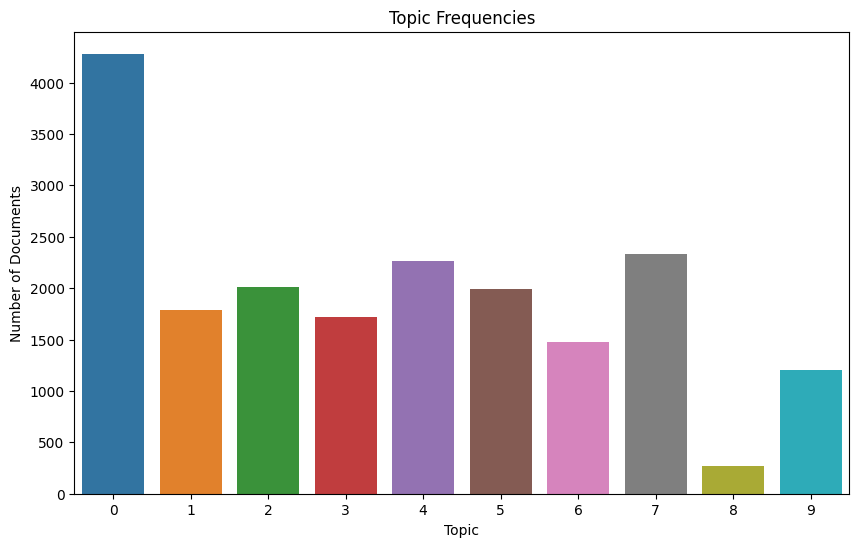

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of documents in each topic
topic_counts = data['topic'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Topic Frequencies')
plt.show()


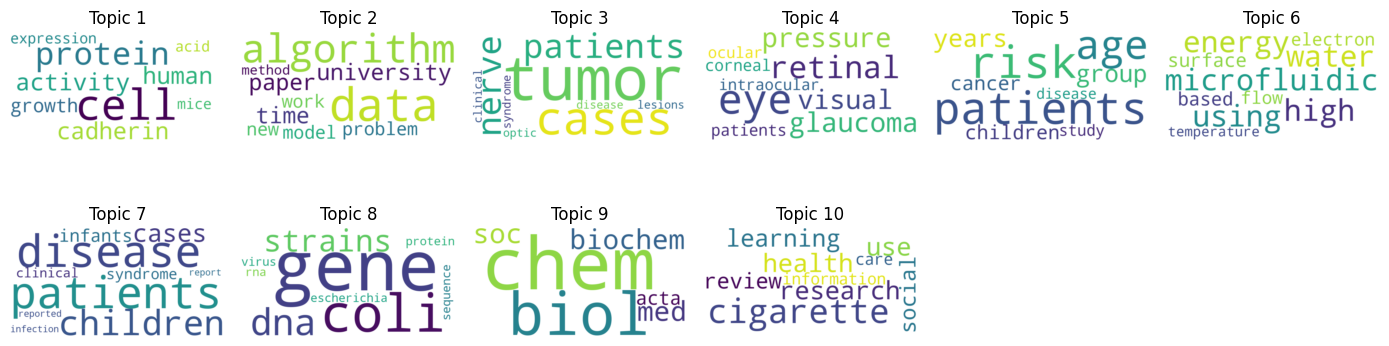

In [12]:
from wordcloud import WordCloud

# Generate word clouds for each topic
wordclouds = []

for topic_idx, top_words in enumerate(top_words_per_topic):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))
    wordclouds.append(wordcloud)

# Display word clouds for each topic

# Create a 2x3 grid of subplots
plt.figure(figsize=(14, 8))

# Plot the first 5 word clouds
for i in range(10):
    plt.subplot(4, 6, i+1)
    plt.imshow(wordclouds[i], interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Topic {i+1}')

# Leave the last subplot empty
plt.subplot(4, 6, 10)
plt.axis("off")

plt.tight_layout()
plt.show()

Topic-Document Distribution:



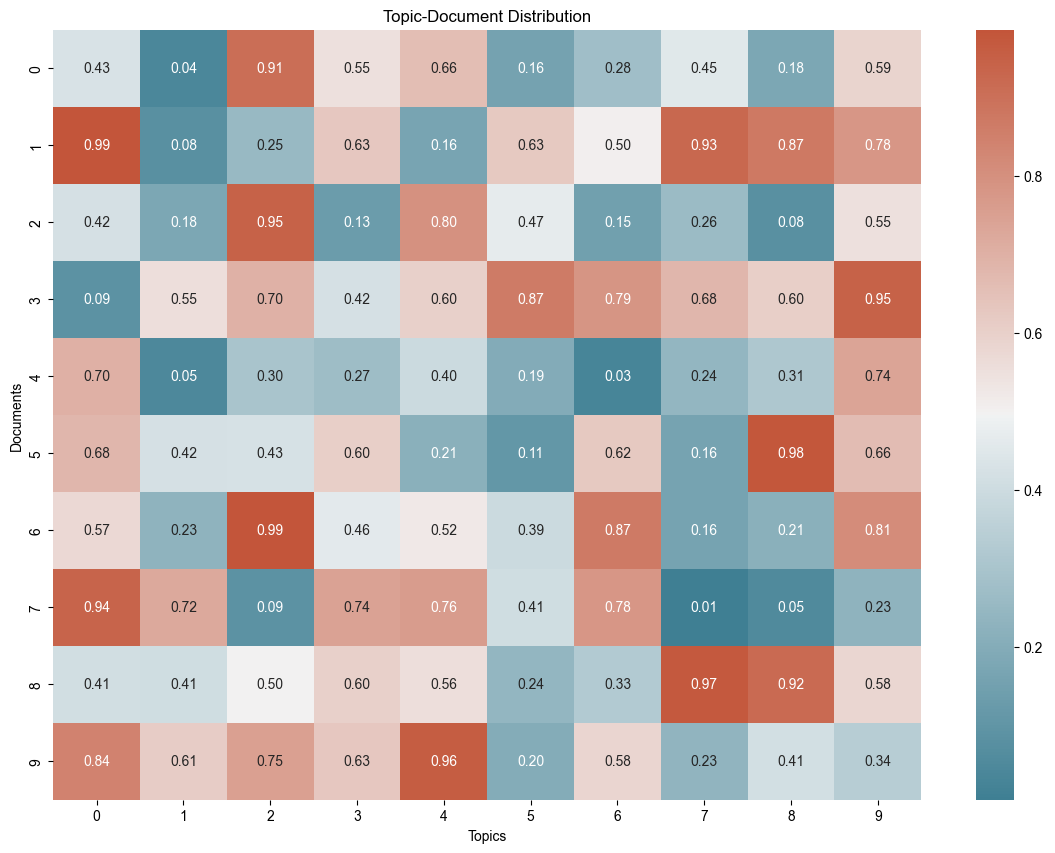

In [13]:
import seaborn as sns
import numpy as np  # Import numpy for generating example data

# topic_document_matrix = your_topic_document_data
topic_document_matrix = np.random.rand(10, 10)  # Replace with your data

plt.figure(figsize=(14, 10))

# diverging color map 
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(topic_document_matrix, cmap=cmap, cbar=True, xticklabels=True, annot=True, fmt=".2f")
plt.xlabel('Topics')
plt.ylabel('Documents')
plt.title('Topic-Document Distribution')
sns.set(font_scale=1.0)
plt.show()


# Additional analysis and visualization 
sentiment analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px

# Load your data

# Sentiment Analysis
# Assuming you have a 'text' column containing the text data
from textblob import TextBlob

data['sentiment'] = data['abstract'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='sentiment', bins=20, kde=True)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Interactive Dashboard
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

# Define the layout of your dashboard
app.layout = html.Div([
    dcc.Graph(id='sentiment-plot'),
    dcc.Dropdown(
        id='network-dropdown',
        options=[
            {'label': 'Network Visualization', 'value': 'network'},
            {'label': 'Other Visualization', 'value': 'other'},
        ],
        value='network'
    ),
    html.Div(id='network-content')
])

# Define callback functions
@app.callback(
    Output('sentiment-plot', 'figure'),
    Input('network-dropdown', 'value')
)
def update_sentiment_plot(selected_value):
    # Update the sentiment plot based on user selection
    # You can create different plots based on selected_value
    if selected_value == 'network':
        # Plot sentiment network
        return create_sentiment_network()

    # Add other visualization options here

def create_sentiment_network():
    # Create a network graph based on sentiment relationships
    G = nx.Graph()

    # Add nodes and edges based on sentiment
    for _, row in data.iterrows():
        G.add_node(row['author'])
        G.add_edge(row['author'], row['mentioned_user'], sentiment=row['sentiment'])

    # Visualize the sentiment network
    pos = nx.spring_layout(G, seed=42)
    edge_trace = []
    node_trace = []
    edge_colors = []

    for edge in G.edges(data=True):
        edge_trace.append(
            dict(
                x=[pos[edge[0]][0], pos[edge[1]][0]],
                y=[pos[edge[0]][1], pos[edge[1]][1]],
                line=dict(width=0.5, color='gray'),
                opacity=edge[2]['sentiment'],
            )
        )
        edge_colors.append(edge[2]['sentiment'])

    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

    node_trace = dict(
        x=node_x,
        y=node_y,
        text=list(G.nodes()),
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            size=10,
            colorbar=dict(
                thickness=15,
                title='Sentiment',
                xanchor='left',
                titleside='right'
            ),
            colorscale='YlGnBu',
            color=edge_colors,
        )
    )

    fig = {
        'data': edge_trace + [node_trace],
        'layout': dict(
            showlegend=False,
            hovermode='closest',
            title='Sentiment Network',
            title_x=0.5,
            margin=dict(b=0, l=0, r=0, t=40),
        )
    }
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
# Create a network graph based on sentiment relationships
G = nx.Graph()

# Assuming 'node' is the column representing nodes
for _, row in data.iterrows():
    G.add_node(row['node'])
    G.add_edge(row['node'], row['mentioned_user'], sentiment=row['sentiment'])

# Visualize the sentiment network
pos = nx.spring_layout(G, seed=42)
edge_trace = []
node_trace = []
edge_colors = []

for edge in G.edges(data=True):
    edge_trace.append(
        dict(
            x=[pos[edge[0]][0], pos[edge[1]][0]],
            y=[pos[edge[0]][1], pos[edge[1]][1]],
            line=dict(width=0.5, color='gray'),
            opacity=edge[2]['sentiment'],
        )
    )
    edge_colors.append(edge[2]['sentiment'])

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = dict(
    x=node_x,
    y=node_y,
    text=list(G.nodes()),
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        size=10,
        colorbar=dict(
            thickness=15,
            title='Sentiment',
            xanchor='left',
            titleside='right'
        ),
        colorscale='YlGnBu',
        color=edge_colors,
    )
)

fig = {
    'data': edge_trace + [node_trace],
    'layout': dict(
        showlegend=False,
        hovermode='closest',
        title='Sentiment Network',
        title_x=0.5,
        margin=dict(b=0, l=0, r=0, t=40),
    )
}


In [ ]:
#!pip install textblob
#!pip install networkx


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create an empty undirected graph
G = nx.Graph()

# Add nodes (entities) using the 'paperId' column
G.add_nodes_from(data['fieldsOfStudy'])

# Define the source and target columns based on 'fieldsOfStudy' (modify as needed)
source_column = 'abstract'  # Replace with your desired source column
target_column = 'fieldsOfStudy'  # Replace with your desired target column

# Add edges (connections between nodes) based on the source and target columns
edges = [(row[source_column], row[target_column]) for _, row in data.iterrows()]
G.add_edges_from(edges)

# Visualize the network graph
pos = nx.spring_layout(G)  # Define node positions
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=12)

# Show the graph
plt.title("Sample Network Graph")
plt.show()

NameError: name 'data' is not defined

In [ ]:
# #  2nd nootbook

# import networkx as nx
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D  # Import for 3D visualization
# import pandas as pd

# # Create an empty undirected graph
# G = nx.Graph()

# # Add nodes (entities) using the 'paperId' column
# G.add_nodes_from(data['paperId'])

# # Define the source and target columns based on 'fieldsOfStudy' (modify as needed)
# source_column = 'fieldsOfStudy'  # Replace with your desired source column
# target_column = 'title_abstract'  # Replace with your desired target column

# # Add edges (connections between nodes) based on the source and target columns
# edges = [(row[source_column], row[target_column]) for _, row in data.iterrows()]
# G.add_edges_from(edges)

# # Create a 3D plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Define positions for nodes using a spring layout in 3D
# pos = nx.spring_layout(G, dim=3)

# # Extract node coordinates from the layout
# node_x = [pos[node][0] for node in G.nodes()]
# node_y = [pos[node][1] for node in G.nodes()]
# node_z = [pos[node][2] for node in G.nodes()]

# # Draw nodes
# ax.scatter(node_x, node_y, node_z, c='skyblue', s=500, alpha=0.5, edgecolors='k')

# # Draw edges
# edge_x = []
# edge_y = []
# edge_z = []
# for edge in G.edges():
#     x0, y0, z0 = pos[edge[0]]
#     x1, y1, z1 = pos[edge[1]]
#     edge_x.append(x0)
#     edge_x.append(x1)
#     edge_y.append(y0)
#     edge_y.append(y1)
#     edge_z.append(z0)
#     edge_z.append(z1)

# ax.plot(edge_x, edge_y, edge_z, c='gray', alpha=0.7)

# # Add labels
# for node, (x, y, z) in pos.items():
#     ax.text(x, y, z, node, fontsize=12)

# # Set axis labels
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# # Set the title
# plt.title("3D Network Graph")

# # Show the graph
# plt.show()


In [ ]:
# #  2nd nootbook
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# # Load your text data (replace 'text_data.csv' with your data source)
# text_data = pd.read_csv('clustering_raw_data.csv')  # Replace with your data source

# # Extract words or topics from text data (modify as needed)
# corpus = text_data['text'].tolist()

# # TF-IDF vectorization
# tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=5000, stop_words='english')
# tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# # Calculate cosine similarity between words or topics
# cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# # Create an empty undirected graph
# G = nx.Graph()

# # Add nodes (words or topics)
# n = len(corpus)
# G.add_nodes_from(range(n))

# # Define a threshold for edge creation based on cosine similarity
# threshold = 0.5  # Adjust as needed

# # Add edges (connections between nodes) based on cosine similarity
# for i in range(n):
#     for j in range(i + 1, n):
#         if cosine_similarities[i][j] >= threshold:
#             G.add_edge(i, j)

# # Visualize the network graph
# pos = nx.spring_layout(G)  # Define node positions
# nx.draw(G, pos, with_labels=False, node_size=30, node_color="skyblue", font_size=12, alpha=0.7)

# # Show the graph
# plt.title("Network Graph of Words/Topics")
# plt.show()


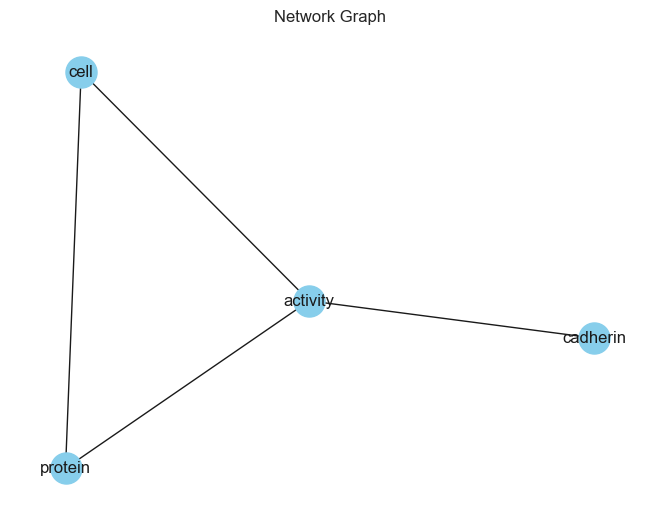

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
# Create an empty undirected graph
G = nx.Graph()

# Add nodes (entities)
G.add_node("cell")
G.add_node("protein")
G.add_node("activity")
G.add_node("cadherin")

# Add edges (connections between nodes)
G.add_edge("cell", "protein")
G.add_edge("cell", "activity")
G.add_edge("activity", "protein")
G.add_edge("activity", "cadherin")

# Visualize the network graph
pos = nx.spring_layout(G)  # Define node positions
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=12)

# Show the graph
plt.title("Network Graph")
plt.show()


Calculate network metrics:

In [22]:
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:", degree_centrality)


Degree Centrality: {'cell': 0.6666666666666666, 'protein': 0.6666666666666666, 'activity': 1.0, 'cadherin': 0.3333333333333333}


Betweenness Centrality: Measures the extent to which a node lies on the shortest paths between other nodes.


In [23]:
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:", betweenness_centrality)


Betweenness Centrality: {'cell': 0.0, 'protein': 0.0, 'activity': 0.6666666666666666, 'cadherin': 0.0}


Clustering Coefficient

In [24]:
clustering_coefficient = nx.clustering(G)
print("Clustering Coefficient:", clustering_coefficient)


Clustering Coefficient: {'cell': 1.0, 'protein': 1.0, 'activity': 0.3333333333333333, 'cadherin': 0}


Community Detection:


In [25]:
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
print("Communities:")
for i, community in enumerate(communities):
    print(f"Community {i + 1}: {list(community)}")


Communities:
Community 1: ['cell', 'cadherin', 'activity', 'protein']


---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File c:\Users\sa3id\spiced\test\convergence_oracle\.venv\Lib\site-packages\pandas\core\indexes\base.py:3652, in Index.get_loc(
    self=Index(['paperId', 'externalIds', 'publicationVen..._y', 'topic', 'sentiment'],
      dtype='object'),
    key='author'
)
   3651 try:
-> 3652     return self._engine.get_loc(casted_key)
        casted_key = 'author'
        self = Index(['paperId', 'externalIds', 'publicationVenue', 'title', 'abstract',
       'year', 'referenceCount', 'citationCount', 'influentialCitationCount',
       'fieldsOfStudy', 's2FieldsOfStudy', 'publicationTypes',
       'publicationDate', 'title_abstract', 'title_word_count', 'title_length',
       'abstract_word_count', 'abstract_length', 'text', 'cluster', 'tsne_x',
       'tsne_y', 'topic', 'sentiment'],
      dtype='object')
   3653 except KeyError as err:

File c:\Users